In [25]:
%store -r df

df.head()

,datetime,location,bsnApIfNoOfUsers,bsnAPIfDot11TransmittedFragmentCount,bsnAPIfDot11MulticastTransmittedFrameCount,bsnAPIfDot11RetryCount,bsnAPIfDot11MultipleRetryCount,bsnAPIfDot11FrameDuplicateCount,bsnAPIfDot11RTSSuccessCount,bsnAPIfDot11RTSFailureCount,...,bsnAPIfDot11MulticastReceivedFrameCount,bsnAPIfDot11FCSErrorCount,bsnAPIfDot11TransmittedFrameCount,bsnAPIfDot11WEPUndecryptableCount,bsnAPIfDot11FailedCount,bsnAPIfLoadRxUtilization,bsnAPIfLoadTxUtilization,bsnAPIfLoadChannelUtilization,bsnAPIfLoadNumOfClients,bsnAPIfPoorSNRClients
0,2015-01-01--00-00,AP-A10-5,0,6532826,355396,1666379,366814,81774,243070,526207,...,870978,431671759,214599205,5,2723435,0,0,0,0,0
1,2015-01-01--00-00,AP-A10-2,0,22747903,357512,3793748,667720,319500,590177,1347650,...,1011316,380220567,231300303,986,9645856,0,0,0,0,0
2,2015-01-01--00-00,Ustka-p1,0,1950,199900,0,0,0,0,0,...,68939,6188,116856285,0,1759,0,0,0,0,0
3,2015-01-01--00-00,AP-C7-1cdf.0fac.9104,0,34592765,357116,9998923,2156216,869887,1780188,2797429,...,497513,93569555,243628923,36,6939857,0,0,0,0,0
4,2015-01-01--00-00,C6-biblioteka,0,68720934,366074,18706657,3103553,1006329,2816447,6741983,...,891345,460786107,278925731,2321,8446559,0,0,1,1,1


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
import re

In [4]:
# data for testing, to not have to keep all data in ram memory
headData = {
    'datetime': ['2015-09-01--00-00', '2015-09-01--00-00', '2015-09-01--00-00', '2015-09-01--00-00', '2015-09-01--00-00'],
    'location': ['AP-A10-5', 'AP-A10-2', 'Ustka-p1', 'AP-C7-1cdf.0fac.9104', 'AP-C7-1cdf.0fac.9144'],
    'bsnApIfNoOfUsers': [0, 0, 1, 0, 0],
}

df = pd.DataFrame(data=headData)
df.head()

,datetime,location,bsnApIfNoOfUsers
0,2015-09-01--00-00,AP-A10-5,0
1,2015-09-01--00-00,AP-A10-2,0
2,2015-09-01--00-00,Ustka-p1,1
3,2015-09-01--00-00,AP-C7-1cdf.0fac.9104,0
4,2015-09-01--00-00,AP-C7-1cdf.0fac.9144,0


In [13]:
# get number of users 
df[(df.location == 'AP-A10-5') | (df.location == 'Ustka-p1')].sum()['bsnApIfNoOfUsers']

1

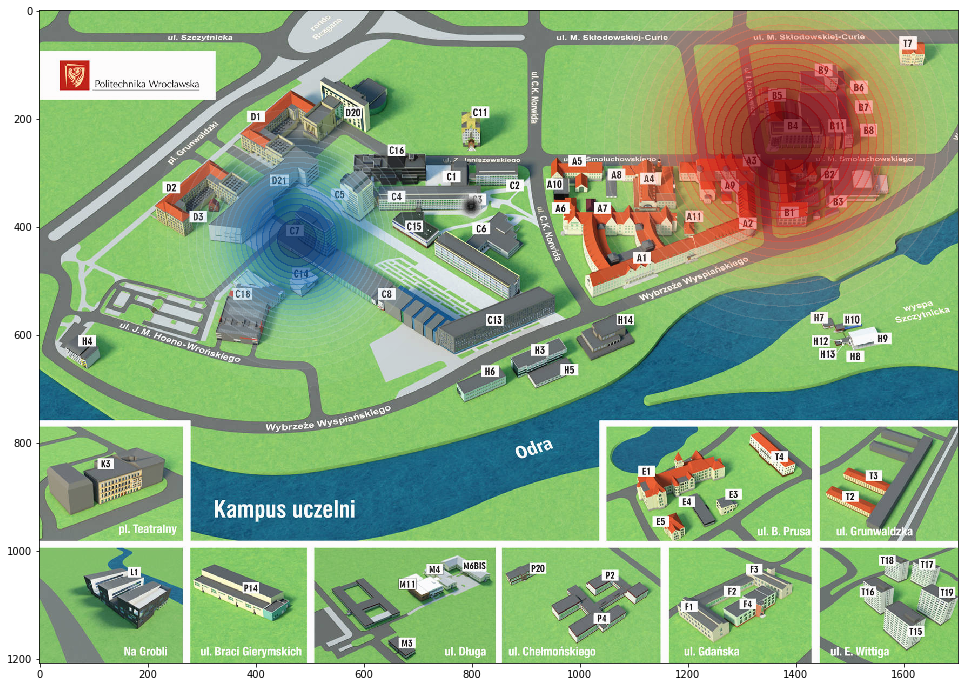

In [87]:
#2D Gaussian function
def twoD_Gaussian(x, y, xo, yo, sigma_x, sigma_y):
    a = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    c = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    g = np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))
    return g.ravel()


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    
    return mycmap

buildings = {
    "C3": {
        "coords": (0.47, 0.3),
        "locations": [],
    },
    "B4": {
        "coords": (0.81, 0.2),
        "locations": [],
    },
    "C7": {
        "coords": (0.28, 0.35),
        "locations": [],
    },
}
# 40921
# 533496
# 350426

def get_buildings_locations():
    locations = df['location'].unique()
    for building in buildings:
        for location in locations:
            pattern = re.compile("AP-{}".format(building))
            if re.match(pattern, location):
                buildings[building]["locations"].append(location)

    return buildings

it = -1
def get_users(locations):
    #return df[df['location'].isin(locations)].sum()['bsnApIfNoOfUsers']
    global it
    it += 1
    if (it == 0):
        return 40921
    if (it == 1):
        return 533496
    if (it == 2):
        return 350426


def assign_cmaps(building_users):
    colors = [("Greys", 0.1, 0.1), ("Blues", 0.13, 0.13), ("Reds", 0.16, 0.16)]
    sorted_building_users = list(sorted(building_users, key = lambda tup: tup[1]))
    total_users = sum([pair[1] for pair in sorted_building_users])
    
    return [{
        item[0]: (
            transparent_cmap(getattr(plt.cm, colors[i][0])),
            item[1] / total_users * 0.3,
            item[1] / total_users * 0.3
        )} for i, item in enumerate(sorted_building_users)]

def generate_gaussians(x, y, cmaps, buildings):
    gaussians = []
    for cmap in cmaps:
        keys = list(cmap.keys())
        vals = cmap[keys[0]]
        gaussians.append((twoD_Gaussian(
            x,
            y,
            buildings[keys[0]]["coords"][0]*x.max(),
            buildings[keys[0]]["coords"][1]*y.max(),
            vals[1]*x.max(),
            vals[2]*y.max()
            ), vals[0]))
    
    return gaussians

def add_contourfs(x, y, ax, gaussians):
    for gaussian in gaussians:
        ax.contourf(x, y, gaussian[0].reshape(x.shape[0], y.shape[1]), 20, cmap=gaussian[1])

def render():
    # Import image and get x and y extents
    I = Image.open('./mapa_pwr.png')
    p = np.asarray(I).astype('float')
    w, h = I.size
    y, x = np.mgrid[0:h, 0:w]

    # Plot image and overlay colormap
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 12)
    ax.imshow(I)
    
    # Get heatmap data
    buildings = get_buildings_locations()
    building_users = []
    for building, data in buildings.items():
        building_users.append((building, get_users(data["locations"])))
    
    cmaps = assign_cmaps(building_users)
    gaussians = generate_gaussians(x, y, cmaps, buildings)
    add_contourfs(x, y, ax, gaussians)

    plt.show()
    
render()